In [1]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from src.models.CNN.model import CNNModel
from src.models.CNN.data import CNNDataModule
from src.models.CNN.train import CNNTrainer

ckpt = "../../logs/cnn_testing/version_58/checkpoints/epoch08-val_loss0.00079.ckpt"
data_params = {'stock': 'nvda', 'feature_set': ['log_return'], 'sequence_len': 20, 'batch_size': 64, 'dataset_len': 5, 'horizon': 5, 'target_var': 'log_return_forecast'}
model = CNNModel.load_from_checkpoint(ckpt)
dm = CNNDataModule(**data_params)
trainer = CNNTrainer()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │  0.00046140849008224905   │
└───────────────────────────┴───────────────────────────┘

<Axes: xlabel='0pred', ylabel='0'>

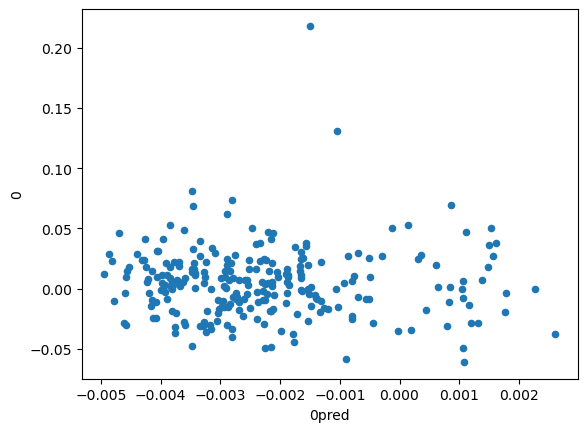

In [33]:
trainer.test(model=model, datamodule=dm)
results_df = pd.DataFrame(model.predictions).join(pd.DataFrame(model.actuals), lsuffix="pred")
results_df.plot.scatter(x="0pred", y="0")

<Axes: >

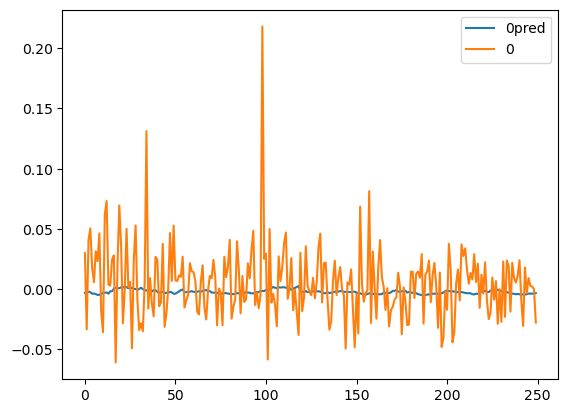

In [34]:
results_df.plot()

In [42]:
from src.misc import evaluate
import numpy as np

evaluate(model.predictions, model.actuals, verbose=True)
evaluate(np.zeros(np.array(model.predictions).shape), model.actuals, verbose=True)


R^2: -0.06534568454566902
MSE: 0.0009228170111832719
RMSE: 0.03037790333751281
MAE: 0.021794346520488034
MAPE: inf
R^2: -0.027215176240682037
MSE: 0.0008897878430744123
RMSE: 0.02982931181027166
MAE: 0.021185385549484636
MAPE: nan


/Users/simon/Documents/II/Dissertation/src/misc.py:102: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/Users/simon/Documents/II/Dissertation/src/misc.py:102: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


(-0.027215176240682037,
 0.0008897878430744123,
 0.02982931181027166,
 0.021185385549484636,
 nan)